In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Calculating Pi

Length of square: 1
Radius of circle: 1


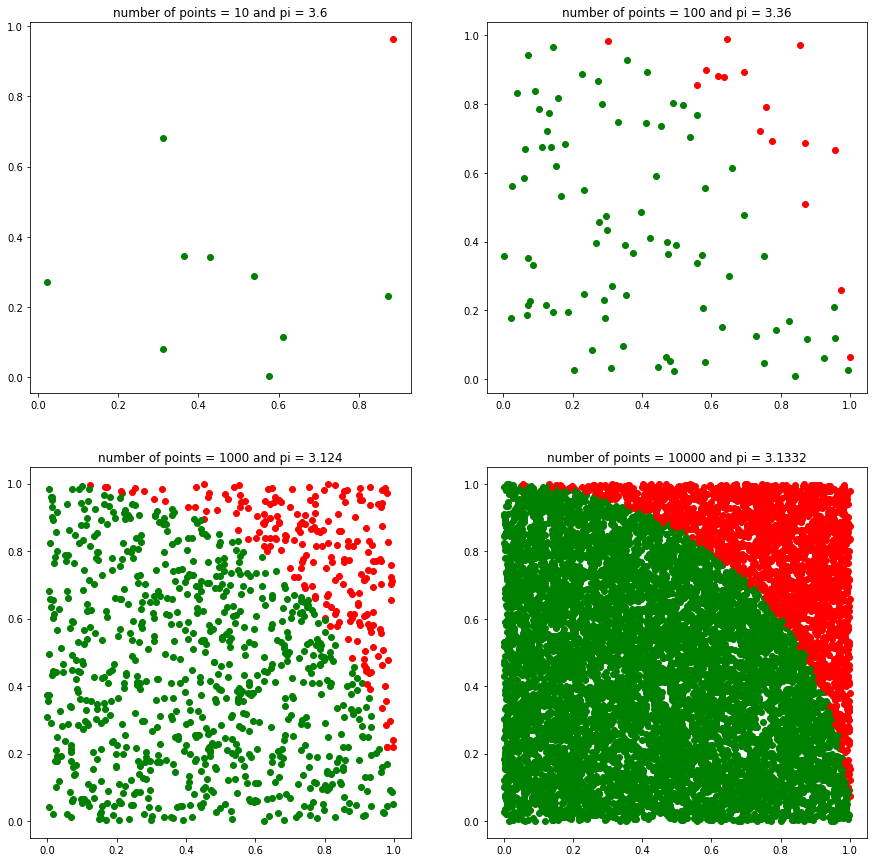

In [102]:
#Plotting the random points:
inside = 0
i=1
a=0
l=int(input("Length of square: "))
r=int(input("Radius of circle: "))
if l/r < 1:
    print(f"Ratio of {l/r} is forbidden")
else:
    fig, axs = plt.subplots(2, 2, figsize=(15,15))
    trials = [[10, 100],[1000, 10000]]
    for p in range(2):
        for j in range(2):
            n = trials[p][j]
            while (i<=n):
                #x = random.random()
                x = random.uniform(a, l)
                #y = random.random()
                y = random.uniform(a, l)
                if ((x**2)+(y**2))<=r:
                    inside+=1
                    axs[p, j].plot(x , y , 'go')
                else:
                    axs[p, j].plot(x , y , 'ro')
                i+=1
            pi = 4 * (l**2 / r**2) * (inside/n)
            axs[p, j].set_title(f'number of points = {n} and pi = {pi}')
            i=1
            inside=0

### Calculating pi with different ratios

In [127]:
#Plotting the random points:
inside = 0
i=1
a=0
l=np.linspace(1, 5, 25)
r=1
n=100000
pi = []

for j in l[:]:
    while (i<=n):
        x = random.uniform(a, j)
        y = random.uniform(a, j)
        if ((x**2)+(y**2))<=r:
            inside+=1
        i+=1
    pi.append(4 * (j**2 / r**2) * (inside/n))
    i=1
    inside=0


### Plotting the results

<ipython-input-171-48ec4f8045b5>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


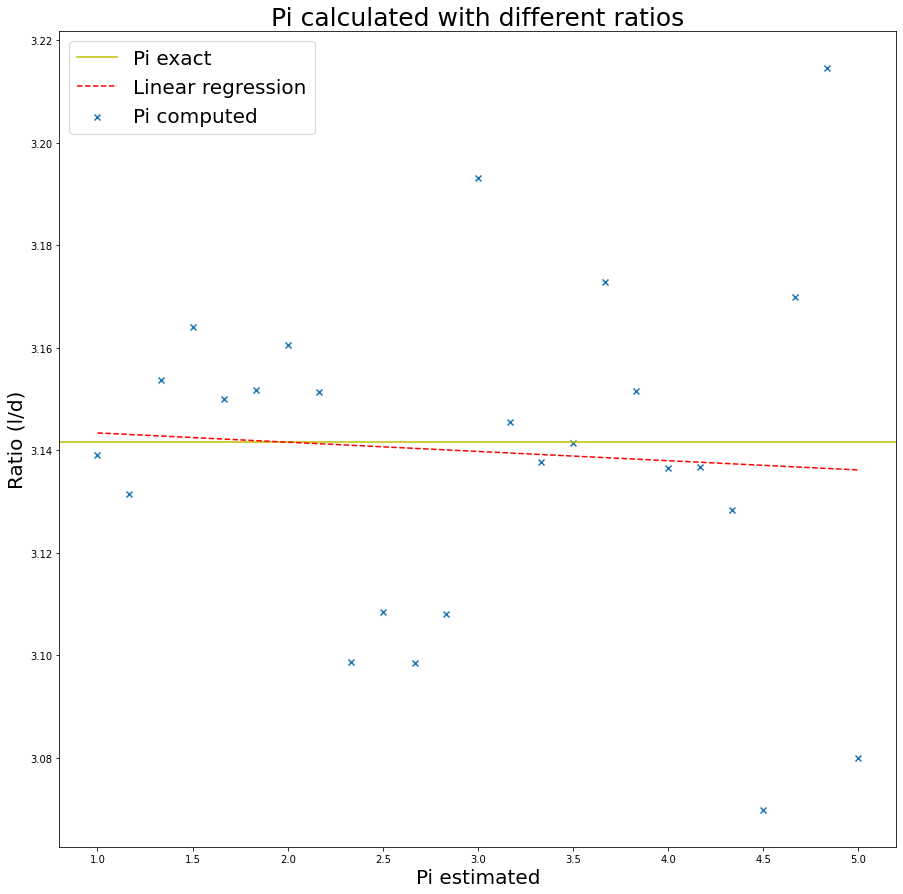

In [171]:
fig = plt.figure(figsize=(15,15))
plt.scatter(l,pi,marker='x', label='Pi computed')
plt.axhline(y=np.pi, color='y', linestyle='-', label="Pi exact")

m, b = np.polyfit(l, pi, 1)
plt.plot(l, m*l + b, color='r', linestyle='dashed', label="Linear regression")

plt.title("Pi calculated with different ratios",fontsize=25)
plt.xlabel('Pi estimated',fontsize=20)
plt.ylabel('Ratio (l/d)',fontsize=20)
plt.legend(loc='best', frameon=True,fontsize=20)
fig.show()
fig.savefig('Pi_different_ratio', dpi=300)

### Relative error

In [187]:
#Plotting the random points:
inside = 0
i=1
a=0
l=1
r=1
trials=np.linspace(4000, 10000, 15)
pi = []
error = []

for n in trials:
    while (i<=n):
        x = random.uniform(a, l)
        y = random.uniform(a, l)
        if ((x**2)+(y**2))<=r:
            inside+=1
        i+=1
    pi = 4 * (l**2 / r**2) * (inside/n)
    error.append(pi-np.pi)
    i=1
    inside=0

In [175]:
error

[0.8584073464102069,
 -0.031812214468036615,
 -0.01628062163772137,
 -0.023083998463294897,
 -0.00751025658604787,
 -0.007753260861067535,
 0.05201480437591366,
 -0.025725073681117205,
 -0.020603766088232334,
 0.0020255484079871877,
 -0.008638902715754515,
 0.017506510957972843,
 0.01132501893164184,
 0.003635562177841667,
 0.005321367102322672,
 -0.003340122955802549,
 -0.012417402294294444,
 0.004723012175866792,
 -0.00845540956959212,
 -0.012465419099782604,
 -0.008482419335759772,
 0.011675351357405273,
 0.0062073736544516755,
 0.01702444161521033,
 0.012455213215617711,
 0.0007393211564705737,
 -0.007155338493931129,
 0.016613650983242412,
 0.00928679269798005,
 0.004669833492535691,
 0.008219207487094149,
 -0.006377391924415221,
 -0.014317655931128659,
 0.004257076990820785,
 0.006225768622635464,
 0.004086076858888177,
 -0.010588407953363799,
 0.007929458835283842,
 -0.003550118297067417,
 0.013018002147911822,
 -0.018893420303911057,
 0.0028934825634157058,
 -0.0087048958179880

### Plotting relative errors

<ipython-input-196-5a005550300f>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


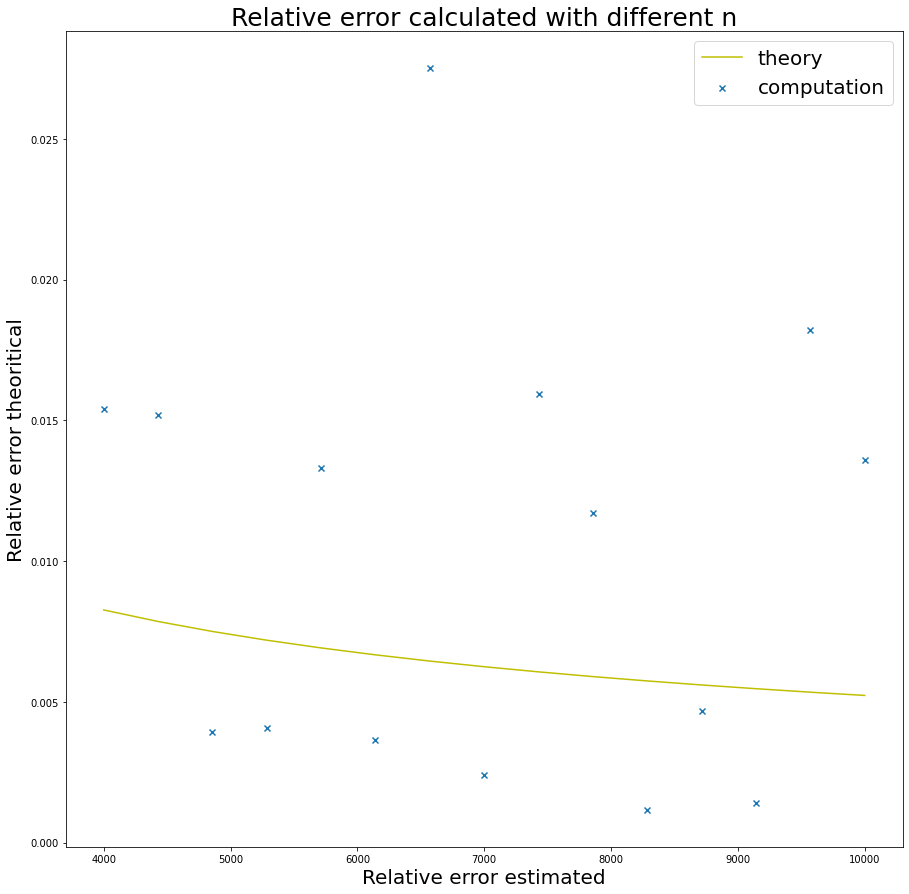

In [196]:
fig = plt.figure(figsize=(15,15))
absValues = [abs(number) for number in error]
plt.scatter(trials,absValues,marker='x', label='computation')
re_comput = (1/trials)**0.5 * ((4 * l**2/np.pi * r**2) - 1)**0.5
plt.plot(trials, re_comput , color='y', linestyle='-', label="theory")

plt.title("Relative error calculated with different n",fontsize=25)
plt.xlabel('Relative error estimated',fontsize=20)
plt.ylabel('Relative error theoritical',fontsize=20)
plt.legend(loc='best', frameon=True,fontsize=20)
fig.show()
fig.savefig('RE_different_n', dpi=300)

# The photon gas

In [313]:
def MC_photon(step, activation, title):
    """MC Photo Gas"""
    
    cycles=5000
    init_cycles=500
    beta=np.linspace(0.5,4,8)
    
    new=1.0
    old=1.0
    summation=0.0
    count=0.0
    
    average = []
    theoritical = []
    re = []
    n_j = []
    
    for b in beta:
        for i in range(cycles):
            for j in range(init_cycles):
                if random.random() < 0.5:
                    new=old + activation*step + (1-activation)*random.uniform(0, step)
                else:
                    new=old - activation*step - (1-activation)*random.uniform(0, step)
                if new < 0:
                    new=0 
                if random.random() < np.exp(-b * (new-old)):
                    old=new
                if i > init_cycles:
                    summation += old
                    count += 1.0
                    n_j.append(new)
                
        ave = summation/count
        theo = (1/(np.exp(b)-1))
        average.append(ave)
        theoritical.append(theo)
        re.append(np.abs(theo * (ave-theo)))
        
        new=1.0
        old=1.0
        summation=0.0
        count=0.0
        
    #Plotting
    fig = plt.figure(figsize=(15,15))
    plt.scatter(beta,average,marker='x', label='computed')
    plt.plot(beta,theoritical, color='y', linestyle='-', label="exact")
    plt.title(title,fontsize=25)
    plt.xlabel('Reduced temperature beta',fontsize=20)
    plt.ylabel('Average Occupancy',fontsize=20)
    plt.legend(loc='best', frameon=True,fontsize=20)
    fig.show()
    fig.savefig(f'reduced_temp_{step}', dpi=300)
    
    return average, theoritical, re


<ipython-input-313-fe06d355de07>:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


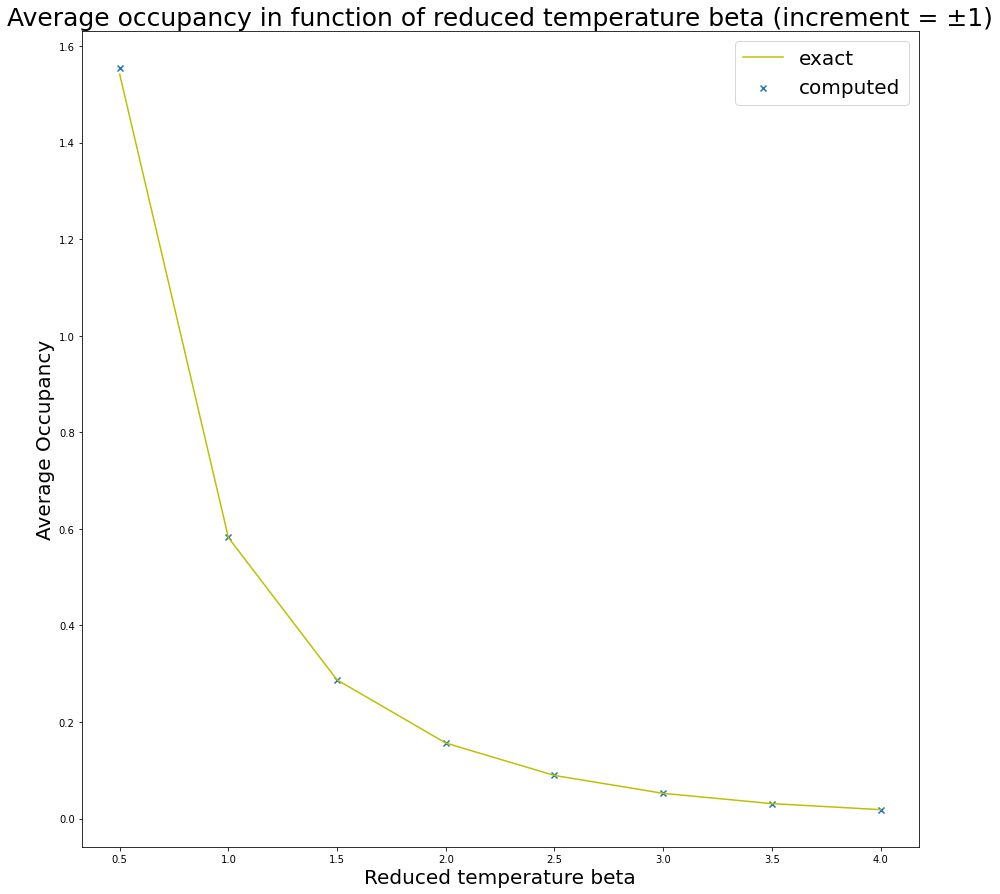

In [314]:
average1, theoritical1, re1 = MC_photon(1,1,"Average occupancy in function of reduced temperature beta (increment = ±1)")


<ipython-input-246-7ed4c6e18116>:52: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


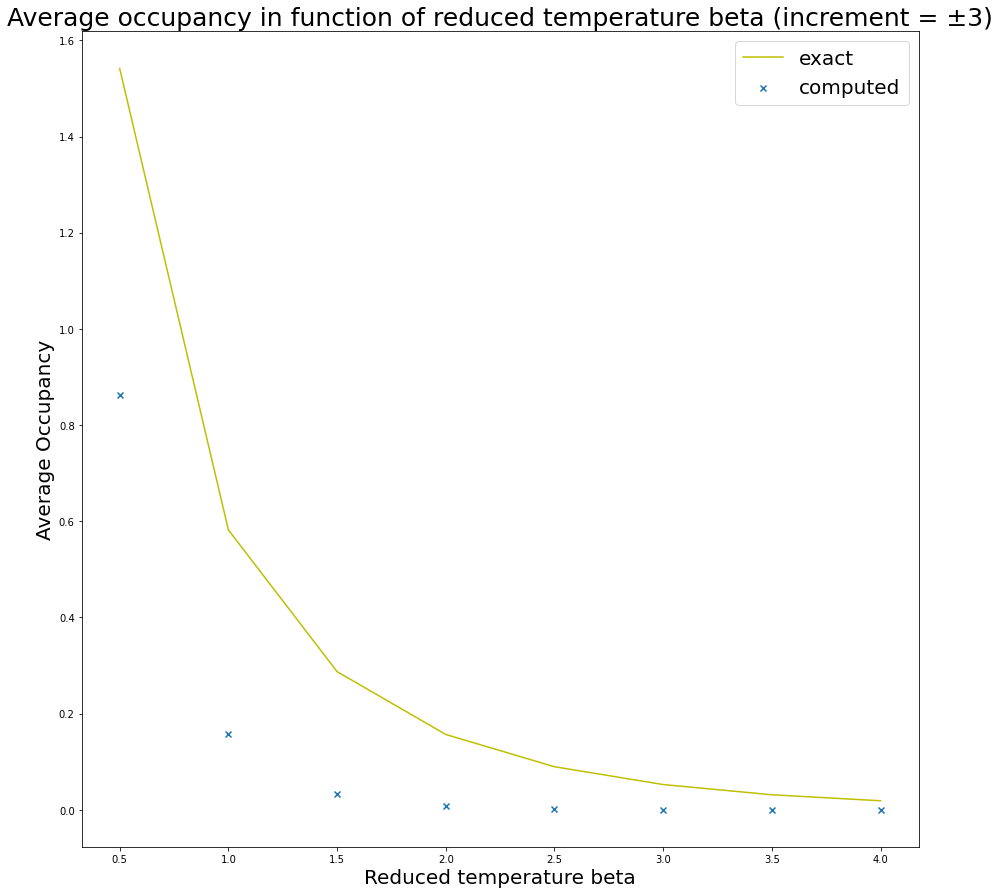

In [248]:
average2, theoritical2, re2 = MC_photon(3,1,"Average occupancy in function of reduced temperature beta (increment = ±3)")



<ipython-input-246-7ed4c6e18116>:52: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


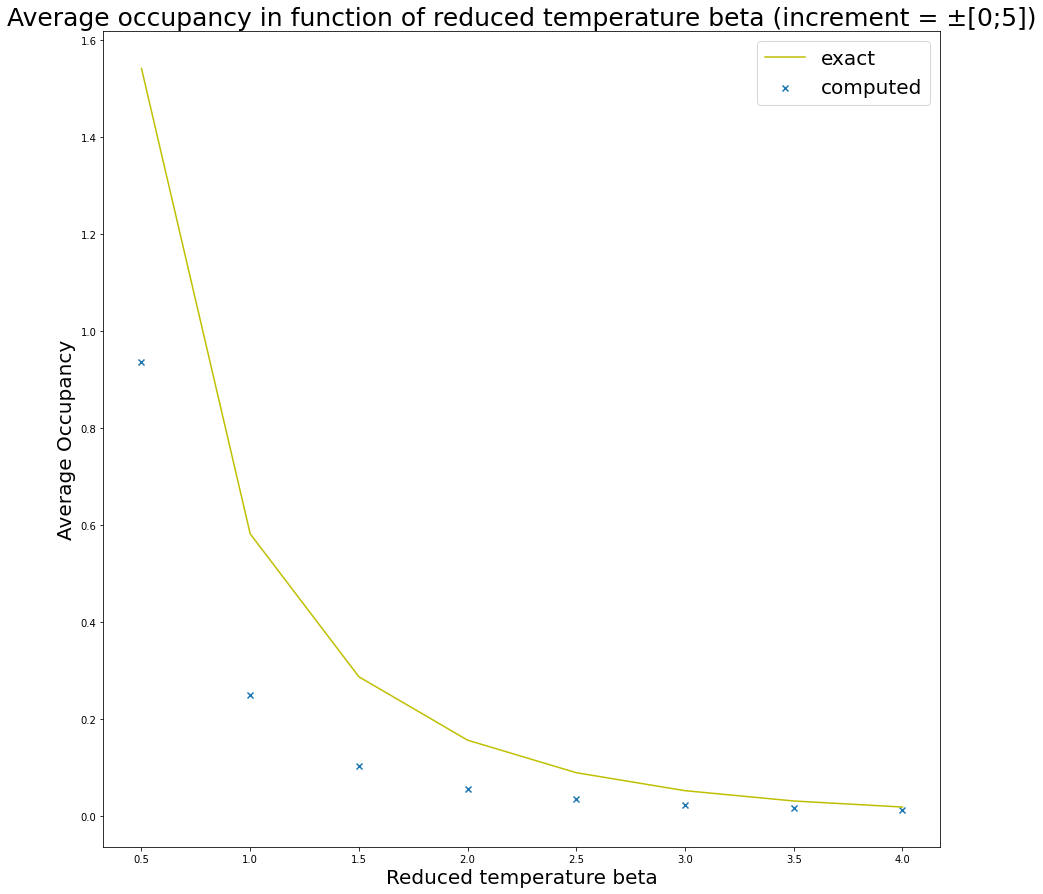

In [249]:
average3, theoritical3, re3 = MC_photon(5,0,"Average occupancy in function of reduced temperature beta (increment = ±[0;5])")



<ipython-input-250-d87c6c947f34>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


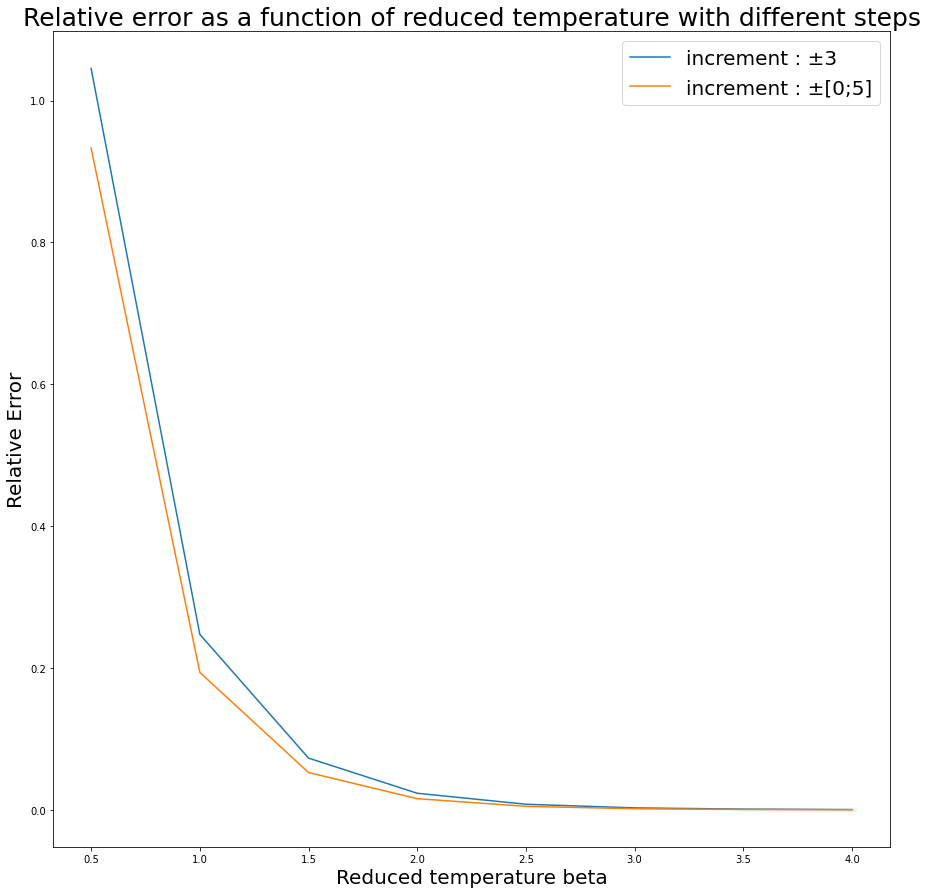

In [250]:
#Plotting Relative Error for ±3 and ±[0;5]
fig = plt.figure(figsize=(15,15))
plt.plot(beta,re2, label='increment : ±3')
plt.plot(beta,re3, label='increment : ±[0;5]')
plt.title("Relative error as a function of reduced temperature with different steps",fontsize=25)
plt.xlabel('Reduced temperature beta',fontsize=20)
plt.ylabel('Relative Error',fontsize=20)
plt.legend(loc='best', frameon=True,fontsize=20)
fig.show()
fig.savefig(f'reduced_temp_re', dpi=300)

In [255]:
def MC_photon_2(step, activation, title):
    """MC Photo Gas"""
    
    cycles=5000
    init_cycles=500
    beta=np.linspace(0.5,4,8)
    
    new=1.0
    old=1.0
    summation=0.0
    count=0.0
    
    average = []
    theoritical = []
    re = []
    
    for b in beta:
        for i in range(cycles):
            for j in range(init_cycles):
                if random.random() < 0.5:
                    new=old + activation*step + (1-activation)*random.uniform(0, step)
                else:
                    new=old - activation*step - (1-activation)*random.uniform(0, step)
                if new < 0:
                    new=0
                    
                if random.random() < np.exp(-b * (new-old)):
                    old=new
                    if i > init_cycles:
                        summation += old
                        count += 1.0
                
        ave = summation/count
        theo = (1/(np.exp(b)-1))
        average.append(ave)
        theoritical.append(theo)
        re.append(np.abs(theo * (ave-theo)))
        
        new=1.0
        old=1.0
        summation=0.0
        count=0.0
        
    #Plotting
    fig = plt.figure(figsize=(15,15))
    plt.scatter(beta,average,marker='x', label='computed')
    plt.plot(beta,theoritical, color='y', linestyle='-', label="exact")
    plt.title(title,fontsize=25)
    plt.xlabel('Reduced temperature beta',fontsize=20)
    plt.ylabel('Average Occupancy',fontsize=20)
    plt.legend(loc='best', frameon=True,fontsize=20)
    fig.show()
    fig.savefig(f'accepted_trial', dpi=300)
    
    return average, theoritical, re

<ipython-input-255-f796eb987e79>:52: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


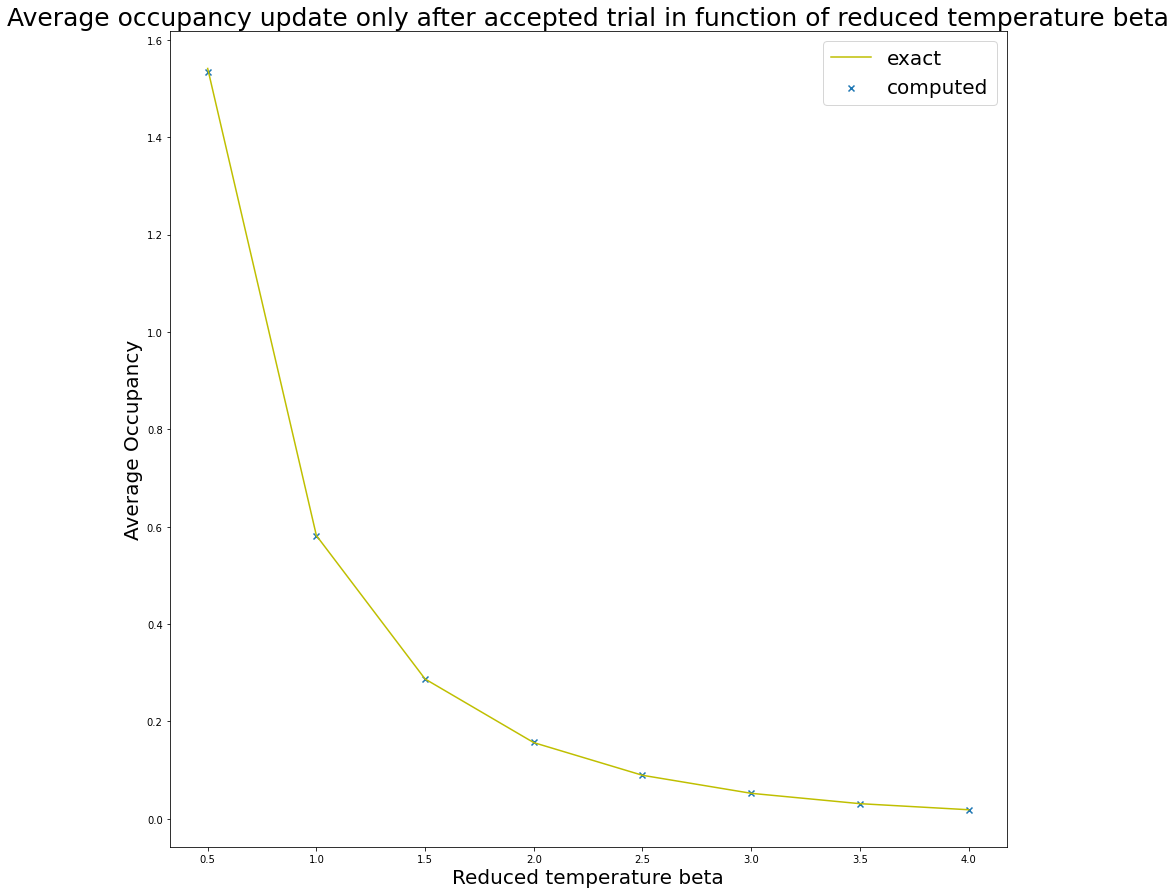

In [256]:
average4, theoritical4, re4 = MC_photon_2(1,1,"Average occupancy update only after accepted trial in function of reduced temperature beta")



In [356]:
def MC_photon_distribution(step, activation, b, title):
    """MC Photo Gas Distribution"""
    
    cycles=5000
    init_cycles=500
    
    new=1.0
    old=1.0

    n_j = []
    
    for i in range(cycles):
        for j in range(init_cycles):
            if random.random() < 0.5:
                new=old + activation*step + (1-activation)*random.uniform(0, step)
            else:
                new=old - activation*step - (1-activation)*random.uniform(0, step)
            if new < 0:
                new=0 
            if random.random() < np.exp(-b * (new-old)):
                old=new
            if i > init_cycles:
                n_j.append(new)
                
    distribution_count = [n_j1.count(x)/len(n_j1) for x in set(n_j1)]    
    distribution_x = [x for x in set(n_j1)]
    
    #Plotting
    fig = plt.figure(figsize=(15,15))
    plt.scatter(distribution_x,distribution_count,marker='x', label='computed')
    n_j_P = np.linspace(distribution_x[1],distribution_x[-1],1000)
    P_analytical = np.exp(-n_j_P*b) * (1 - np.exp(-b))
    plt.plot(n_j_P,P_analytical, color='y', linestyle='-', label="exact")
    plt.title(title,fontsize=25)
    plt.xlabel('Occupancy number',fontsize=20)
    plt.ylabel('Probability',fontsize=20)
    plt.legend(loc='best', frameon=True,fontsize=20)
    fig.show()
    if b == 1:
        fig.savefig('accepted_trial_1', dpi=300)
    else:
        fig.savefig('accepted_trial_2', dpi=300)

<ipython-input-356-8404ab434b1c>:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


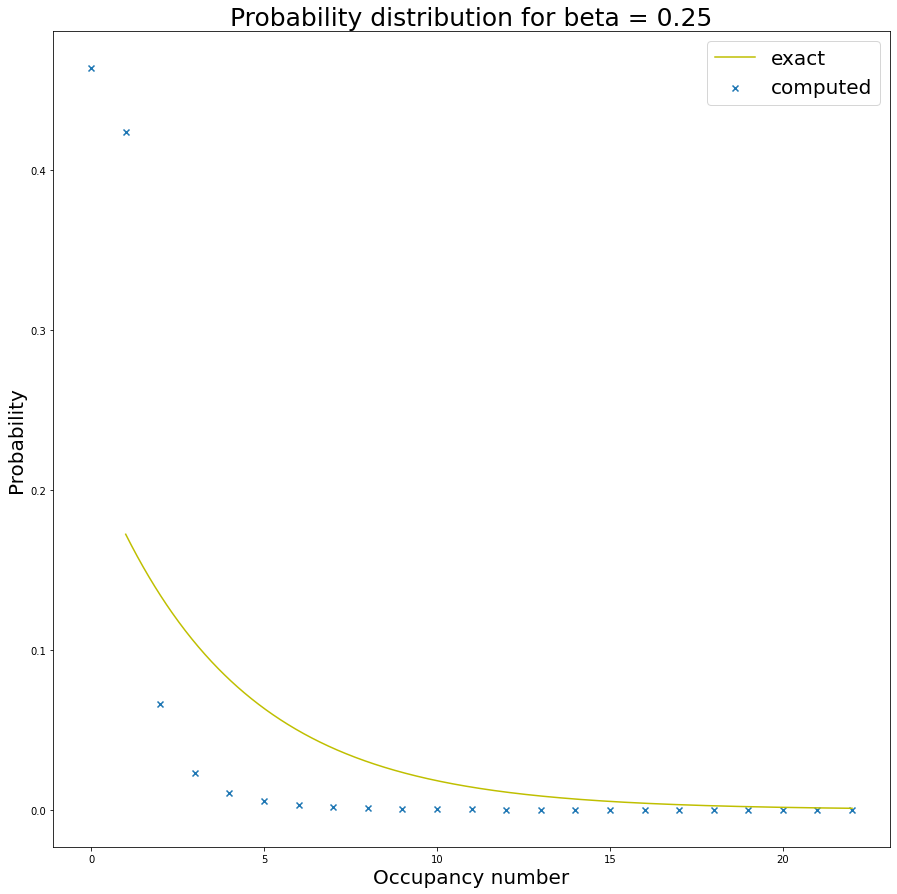

In [357]:
MC_photon_distribution(1, 1, 0.25, f"Probability distribution for beta = 0.25")

<ipython-input-356-8404ab434b1c>:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


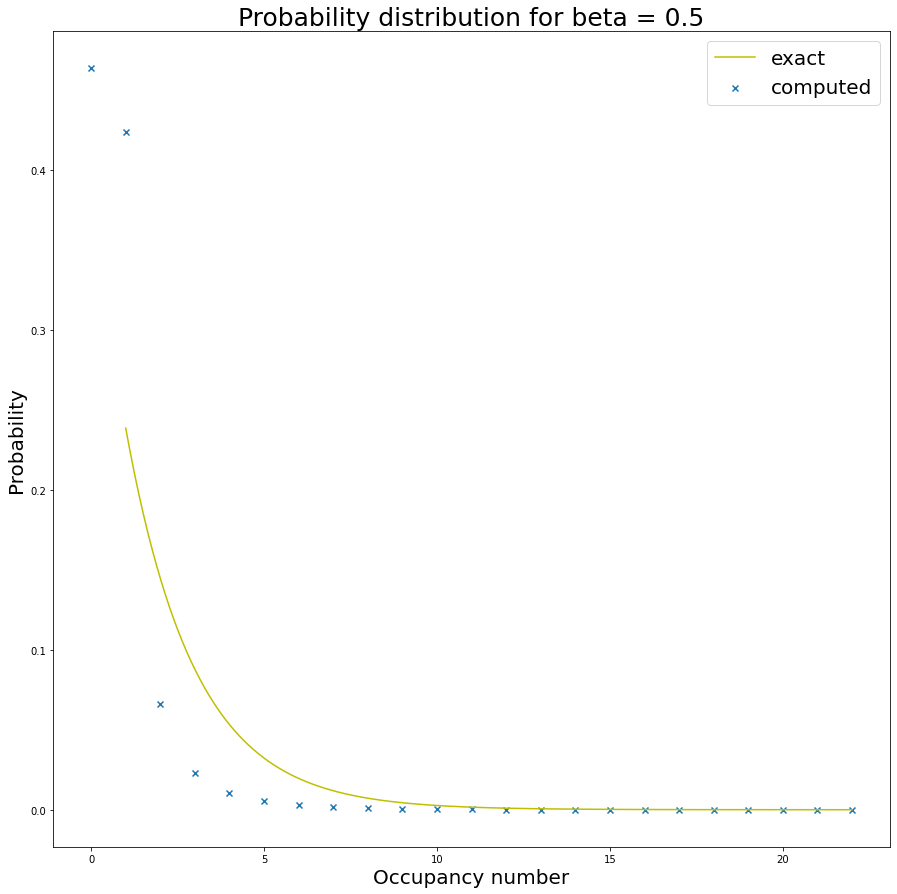

In [358]:
MC_photon_distribution(1, 1, 0.5, f"Probability distribution for beta = 0.5")

# MC of a Lennard-Jones system

The simulation was done using VSC within the C code given.

In [303]:
pressure = pd.read_csv("density_pressure.txt")

In [304]:
pressure

,Density,AveragePressure,CV
0,0.1,0.178391,0.107006
1,0.2,0.326456,0.191301
2,0.3,0.495388,0.256718
3,0.4,0.697349,0.253753
4,0.5,1.079834,0.298024
5,0.6,1.750425,0.414903
6,0.7,3.029283,0.469437
7,0.8,5.268787,0.766278
8,0.9,9.173016,0.711750
9,1.0,14.939507,1.051548


<ipython-input-302-8adcbfa1fa2a>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


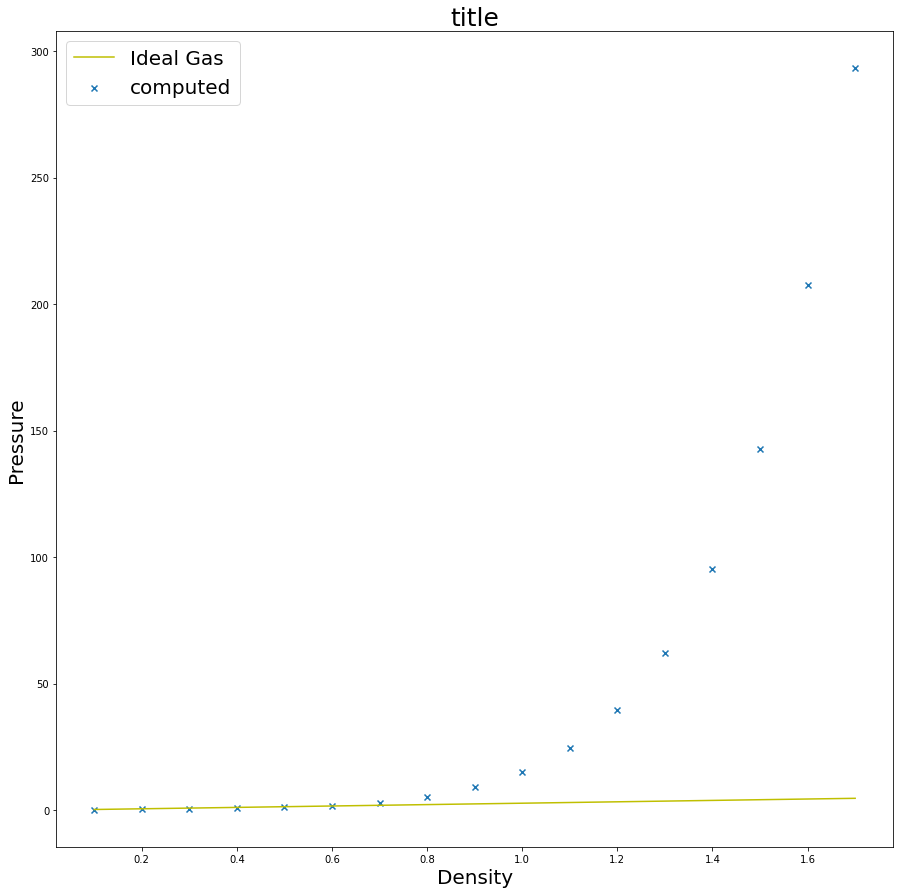

In [302]:
fig = plt.figure(figsize=(15,15))
plt.scatter(pressure.Density, pressure.AveragePressure, marker='x', label='computed')
theoritical = pressure.Density * 1.380649 * 2.0
plt.plot(pressure.Density,theoritical, color='y', linestyle='-', label="Ideal Gas")
plt.title('title',fontsize=25)
plt.xlabel('Density',fontsize=20)
plt.ylabel('Pressure',fontsize=20)
plt.legend(loc='best', frameon=True,fontsize=20)
fig.show()
fig.savefig(f'density_pressure', dpi=300)


<ipython-input-306-4f7657b1ad09>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


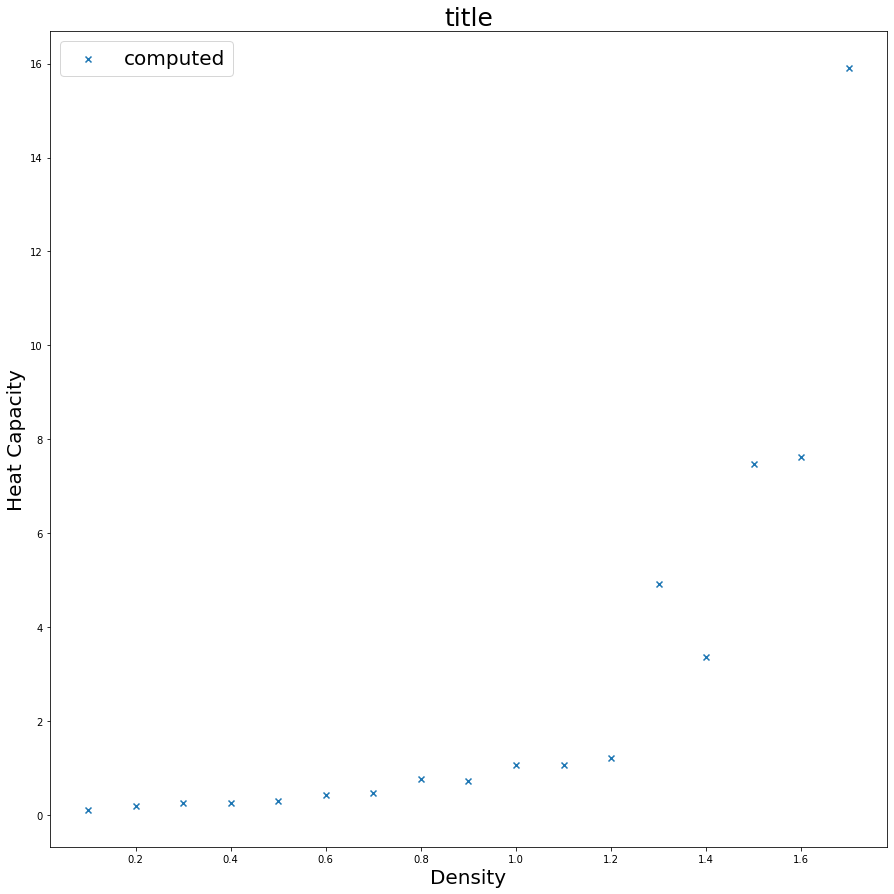

In [306]:
fig = plt.figure(figsize=(15,15))
plt.scatter(pressure.Density, pressure.CV, marker='x', label='computed')
plt.title('title',fontsize=25)
plt.xlabel('Density',fontsize=20)
plt.ylabel('Heat Capacity',fontsize=20)
plt.legend(loc='best', frameon=True,fontsize=20)
fig.show()
fig.savefig(f'density_CV', dpi=300)


# MD of a Lennard-Jones system

This part was done using VSC within the C code given.

In [359]:
energy = pd.read_csv("energy.txt")

In [360]:
energy

,timestep,energy,temperature
0,0.001,0.179965,0.563775
1,0.002,-0.269143,0.490681
2,0.003,0.083337,0.509940
3,0.004,0.236978,0.517081
4,0.005,0.107257,0.481301
5,0.006,-0.123830,0.468775
6,0.007,-0.010203,0.721981
7,0.008,0.118629,0.543814
8,0.009,0.324567,0.581477
9,0.010,0.340868,0.583947


<ipython-input-363-3d47ba96962c>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


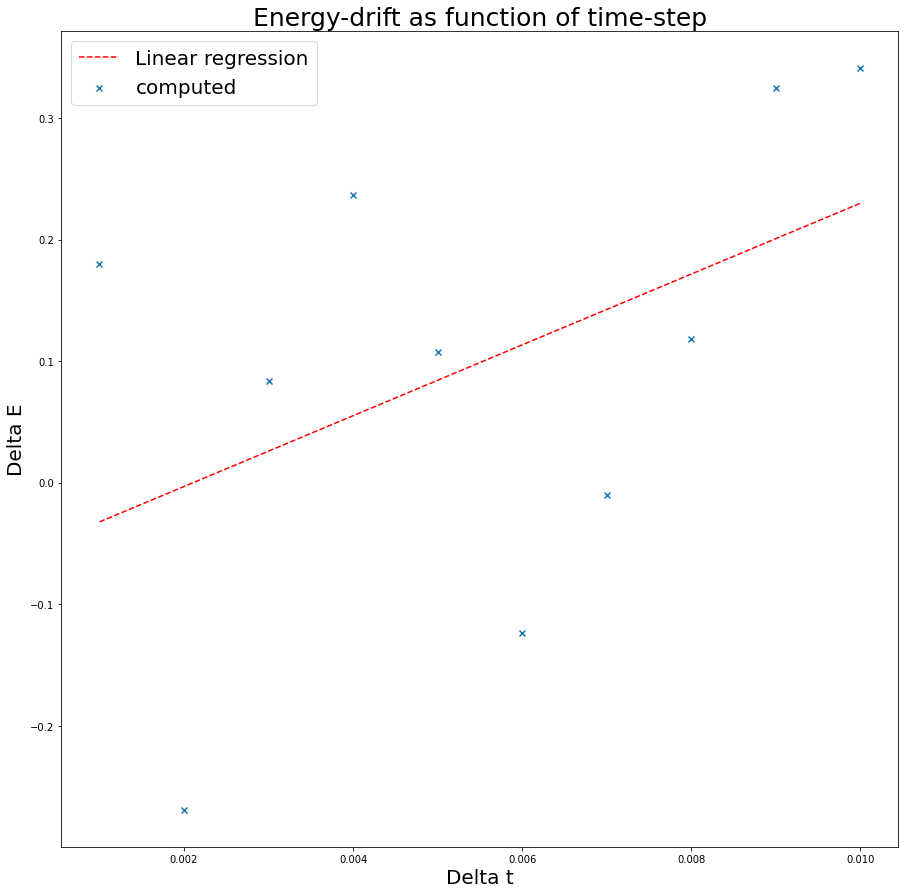

In [363]:
fig = plt.figure(figsize=(15,15))
plt.scatter(energy.timestep, energy.energy, marker='x', label='computed')

m, b = np.polyfit(energy.timestep, energy.energy, 1)
plt.plot(energy.timestep, m*energy.timestep + b, color='r', linestyle='dashed', label="Linear regression")

plt.title('Energy-drift as function of time-step',fontsize=25)
plt.xlabel('Delta t',fontsize=20)
plt.ylabel('Delta E',fontsize=20)
plt.legend(loc='best', frameon=True,fontsize=20)
fig.show()
fig.savefig(f'energy-drift', dpi=300)

<ipython-input-364-c2ea833dcd2d>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


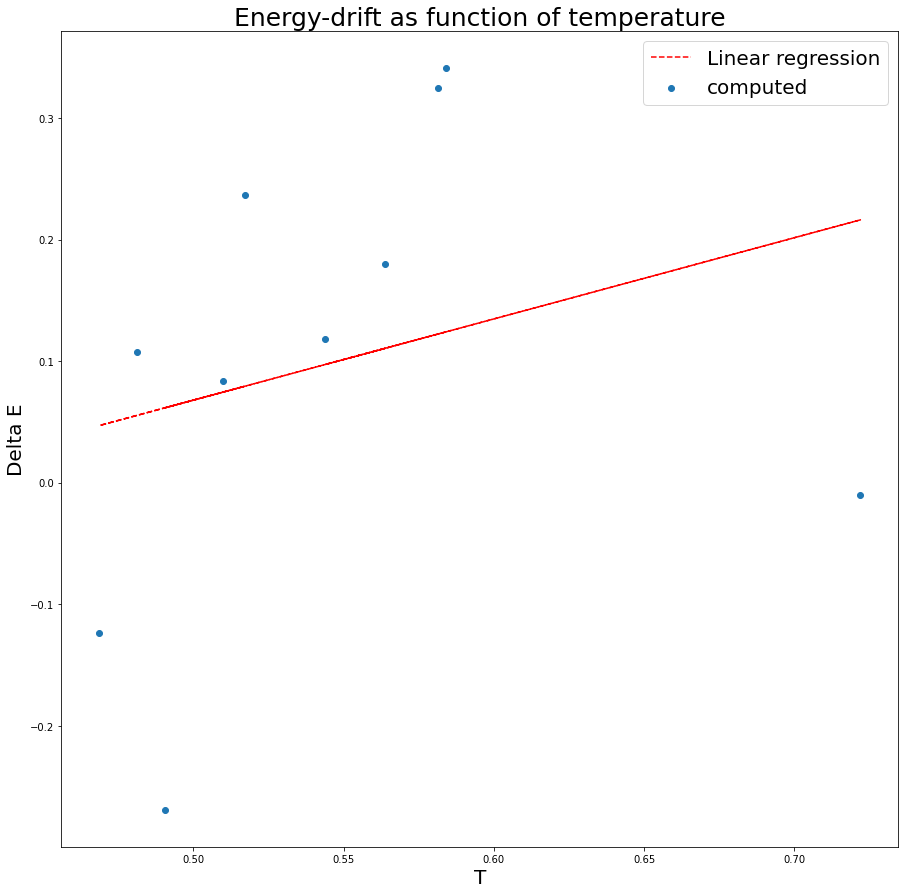

In [364]:
fig = plt.figure(figsize=(15,15))
plt.scatter(energy.temperature, energy.energy, marker='o', label='computed')

m, b = np.polyfit(energy.temperature, energy.energy, 1)
plt.plot(energy.temperature, m*energy.temperature + b, color='r', linestyle='dashed', label="Linear regression")

plt.title('Energy-drift as function of temperature',fontsize=25)
plt.xlabel('T',fontsize=20)
plt.ylabel('Delta E',fontsize=20)
plt.legend(loc='best', frameon=True,fontsize=20)
fig.show()
fig.savefig(f'temperature-drift', dpi=300)

## Diffusion Coefficient (I took the plot from gnuplot)

In [365]:
energy = pd.read_csv("auto-correlation.dat")

In [366]:
energy

,0.010000 0.000000 0.000000
0,0.020000 0.000000 0.000000
1,0.030000 0.000000 0.000000
2,0.040000 0.000000 0.000000
3,0.050000 0.000000 0.000000
4,0.060000 0.000000 0.000000
...,...
7493,74.950000 0.000000 0.000000
7494,74.960000 0.000000 0.000000
7495,74.970000 0.000000 0.000000
7496,74.980000 0.000000 0.000000


In [ ]:
fig = plt.figure(figsize=(15,15))
plt.scatter(energy.temperature, energy.energy, marker='o', label='computed')

m, b = np.polyfit(energy.temperature, energy.energy, 1)
plt.plot(energy.temperature, m*energy.temperature + b, color='r', linestyle='dashed', label="Linear regression")

plt.title('Integral <v(t)xv(0)>',fontsize=25)
plt.xlabel('time',fontsize=20)
plt.ylabel('vacf',fontsize=20)
plt.legend(loc='best', frameon=True,fontsize=20)
fig.show()
fig.savefig(f'auto-correlation', dpi=300)

## Theory

In [370]:
theory = pd.read_csv("theory.txt")

In [368]:
theory

,temperature,pressure,diffusion
0,0.1,-9.568777,-2.90
1,0.2,-8.469906,-4.00
2,0.3,-10.446580,-3.80
3,0.4,-8.978325,-1.98
4,0.5,-1.026006,-2.00
5,0.6,0.267711,-1.95
6,0.7,0.781281,-1.93
7,0.8,1.277945,-1.92
8,0.9,-5.062978,-1.89
9,1.0,-0.530151,-1.90


<ipython-input-376-dec78987032c>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


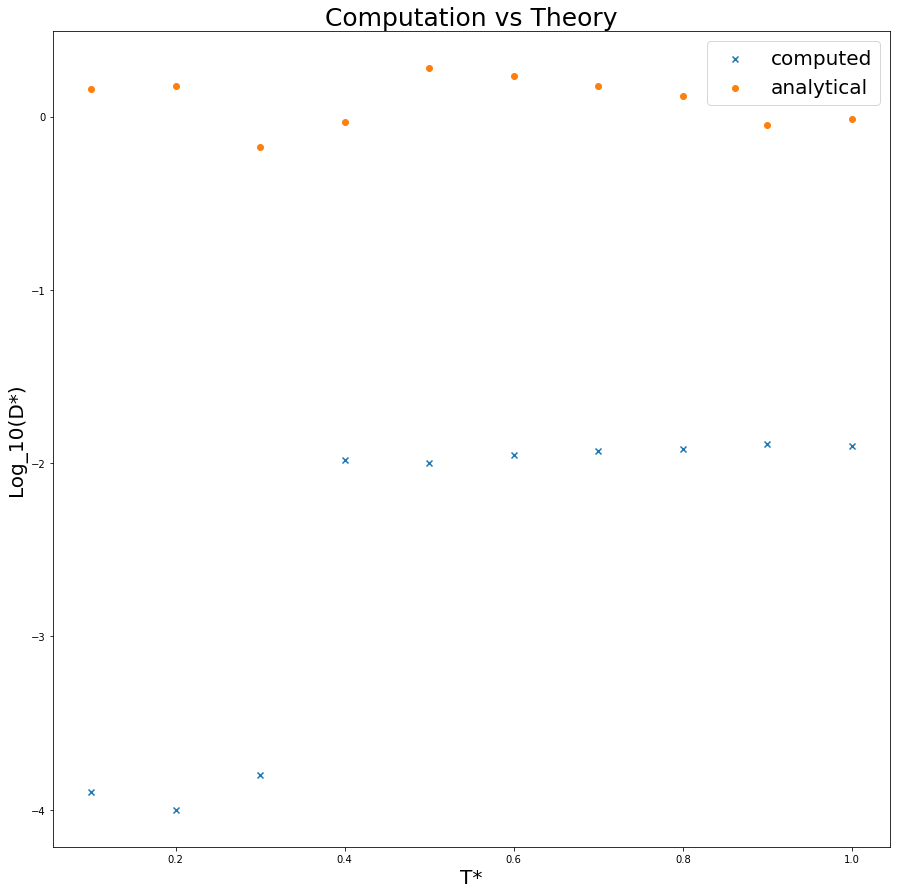

In [376]:
fig = plt.figure(figsize=(15,15))
plt.scatter(theory.temperature, theory.diffusion, marker='x', label='computed')

theory_calcul = np.log10(np.abs(0.05+0.07*theory.pressure-((1.04+0.1*theory.pressure)/theory.temperature)))
plt.scatter(theory.temperature, theory_calcul, marker='o', label='analytical')

plt.title('Computation vs Theory',fontsize=25)
plt.xlabel('T*',fontsize=20)
plt.ylabel('Log_10(D*)',fontsize=20)
plt.legend(loc='best', frameon=True,fontsize=20)
fig.show()
fig.savefig(f'theory', dpi=300)